In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import networkx as nx
import dowhy
import pandas as pd
from dowhy import CausalModel

style.use('fivethirtyeight') # bmh

import math
import dowhy.datasets, dowhy.plotter

import hyppo
import pingouin as pg
import conditional_independence

from hyppo.independence import Hsic

# the code below simple hides some warnings we don't want to see
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

In [45]:
path = "Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']

In [46]:
# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

In [47]:
print(train.sum().sum())
print(test.sum().sum())

11923
60290


In [48]:
print(train.shape)
print(test.shape)
print(target.shape)

(2000, 11)
(10000, 11)
(2000, 1)


In [49]:
target.head()

,0
0,-1
1,1
2,1
3,-1
4,1


In [50]:
avgs = train[names].mean()

In [51]:
avgs

Smoking               0.7525
Yellow_Fingers        0.7820
Anxiety               0.6305
Peer_Pressure         0.3415
Genetics              0.1395
Attention_Disorder    0.3225
Born_an_Even_Day      0.4895
Car_Accident          0.7230
Fatigue               0.7370
Allergy               0.3430
Coughing              0.7005
dtype: float64

In [52]:
train["Target"] = np.array(target)
train["Target"] = train["Target"].apply(lambda x: 0 if x==-1 else x)
train.rename(columns={'Target': 'Lung_Cancer'}, inplace=True)

In [53]:
train.head(20)

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_Cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1
5,1,1,0,1,0,0,1,1,1,1,1,1
6,1,1,1,1,0,0,0,1,1,0,1,1
7,1,1,1,0,0,0,1,1,1,0,1,1
8,0,0,0,0,0,0,0,1,0,0,0,0
9,1,1,1,1,0,0,1,1,1,1,1,1


In [11]:
avgs = train.mean()

In [12]:
names.append('Lung_Cancer')

# Plotting Variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

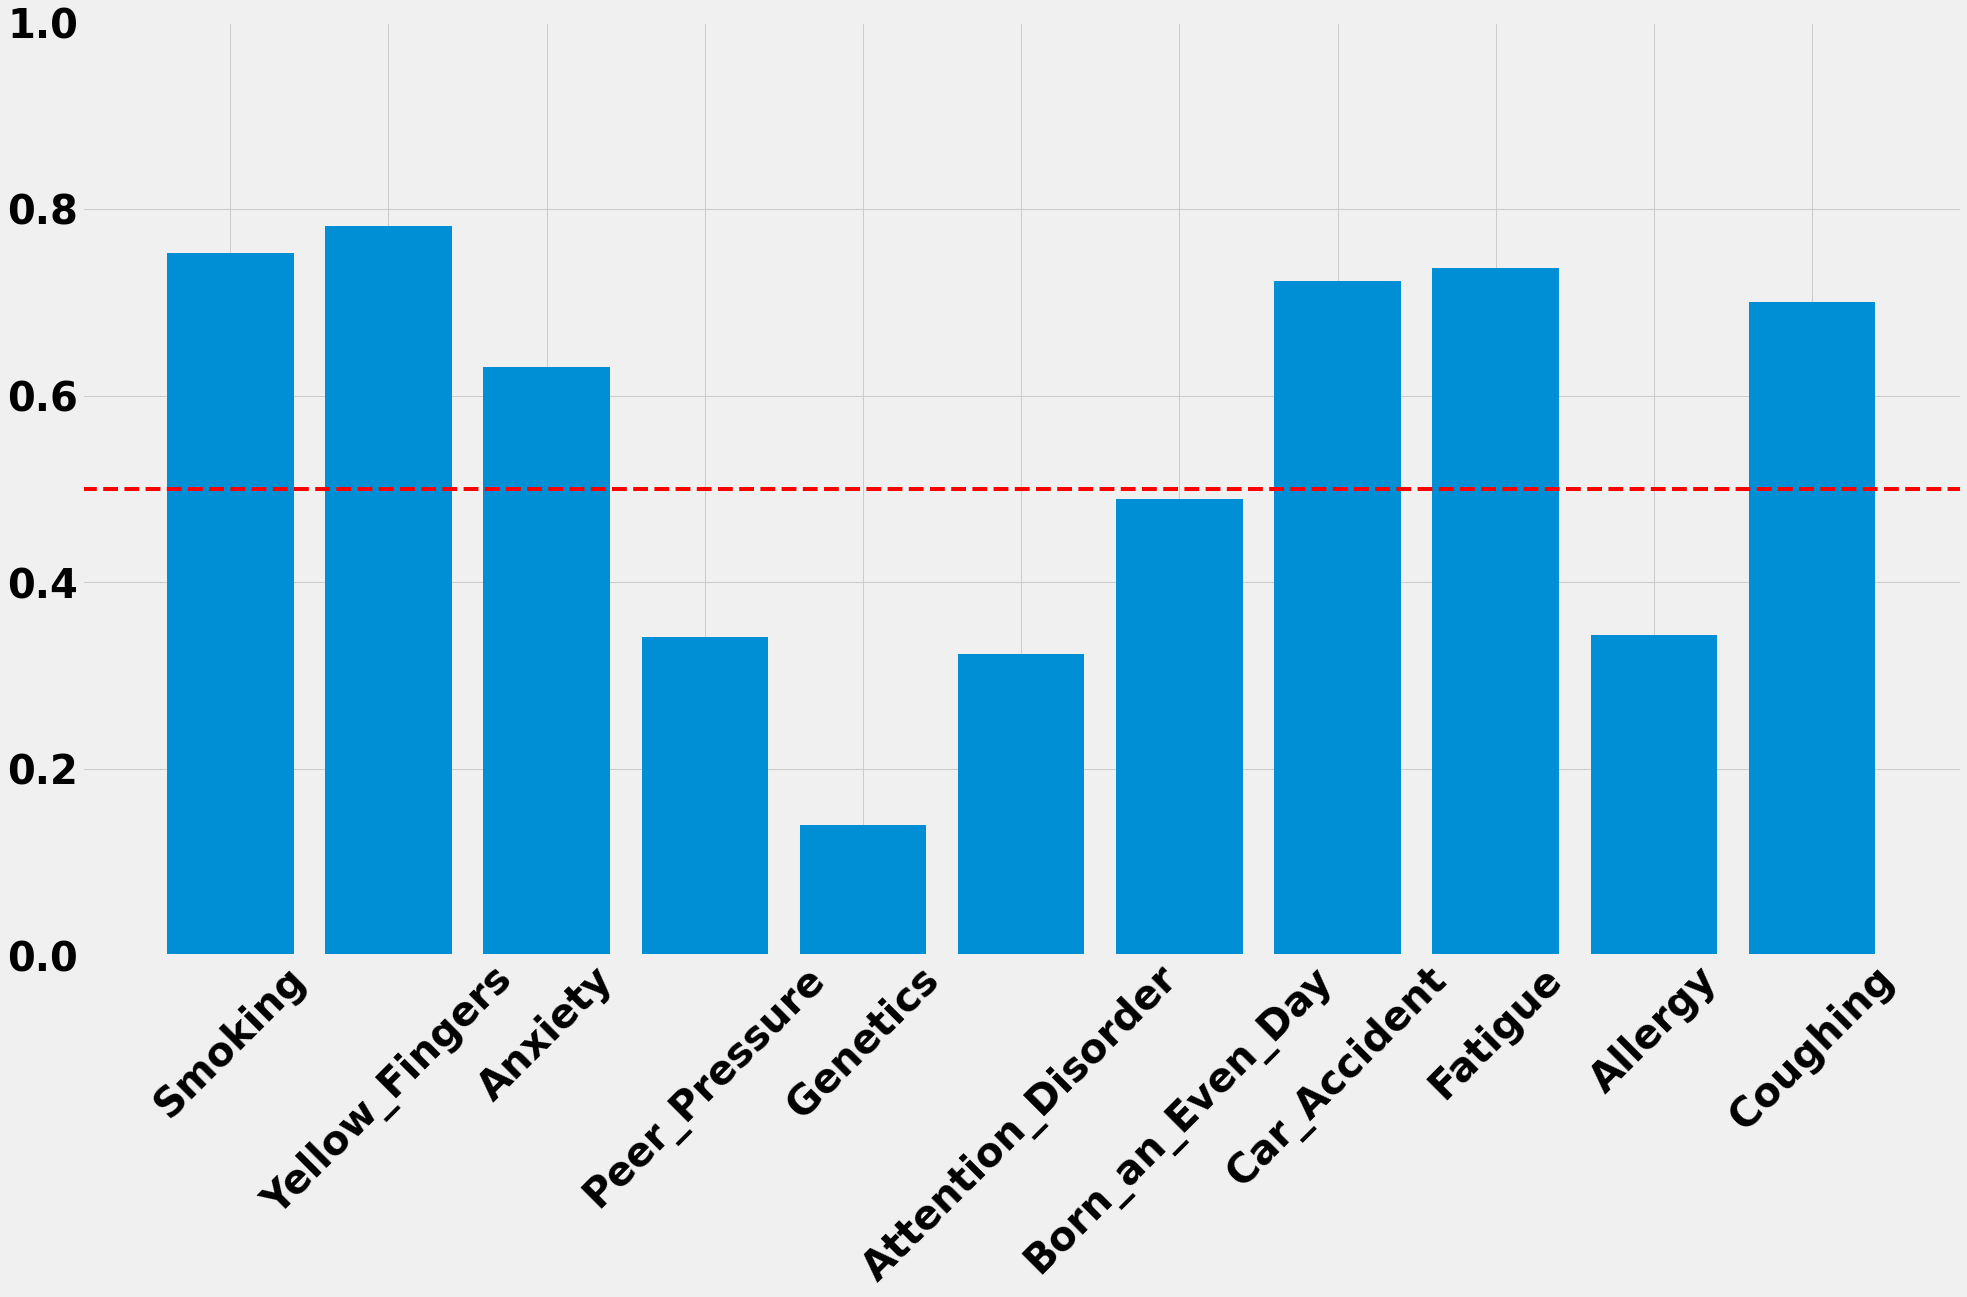

In [54]:
plt.figure(figsize=(30, 16))
plt.bar(names,avgs, )
plt.ylim(0, 1)
plt.xticks(fontsize = 40, weight = 'bold')
plt.yticks(fontsize = 40, weight = 'bold')
plt.axhline(0.5, c='r', linestyle='--')
plt.xticks(rotation=45)

# Correlation

In [55]:
corr_df = round(train.corr(),2)

C:\Users\dolou\AppData\Local\Temp\ipykernel_12748\259138545.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_df, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Heatmap')

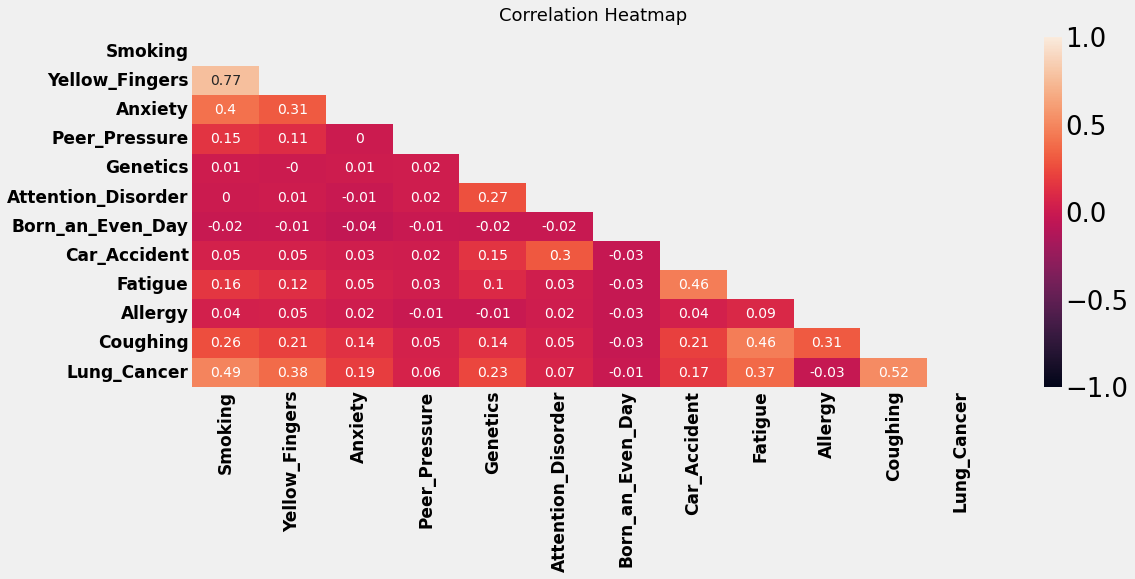

In [56]:

plt.figure(figsize=(16, 6))
plt.xticks(fontsize = 17,weight = 'bold')
plt.yticks(fontsize= 17,weight = 'bold')
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
heatmap = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Contingency Table

In [57]:
#create contingency table
pd.crosstab(index=train['Coughing'], columns=train['Car_Accident'])

Car_Accident,0,1
Coughing,,
0,250,349
1,304,1097


In [58]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[250, 349], [304, 1097]])
round(pvalue,10)

In [59]:
#create contingency table
pd.crosstab(index=train['Coughing'], columns=train['Fatigue'])

Fatigue,0,1
Coughing,,
0,343,256
1,183,1218


In [19]:
oddsratio, pvalue = fisher_exact([[343, 256], [183, 1218]])
round(pvalue,10)

In [20]:
import scipy.stats as stats
res = stats.barnard_exact([[250, 349], [304, 1097]])
res.statistic

res.pvalue

In [21]:
import scipy.stats as stats
res = stats.barnard_exact([[343, 256], [183, 1218]])
res.statistic

res.pvalue

# Graph 

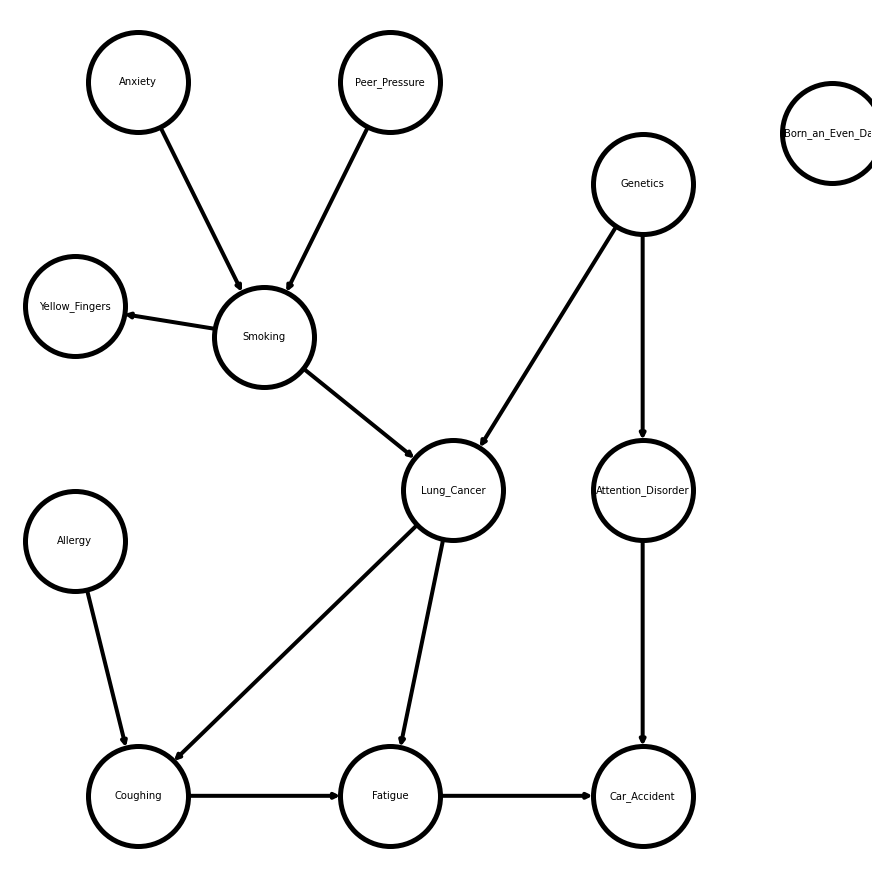

In [60]:
# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(12,12))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "tmp/backdoor_criterion_graph.gml")

plt.show()

# EDA - Tutorial 2

## Plot Treatment & Outcome

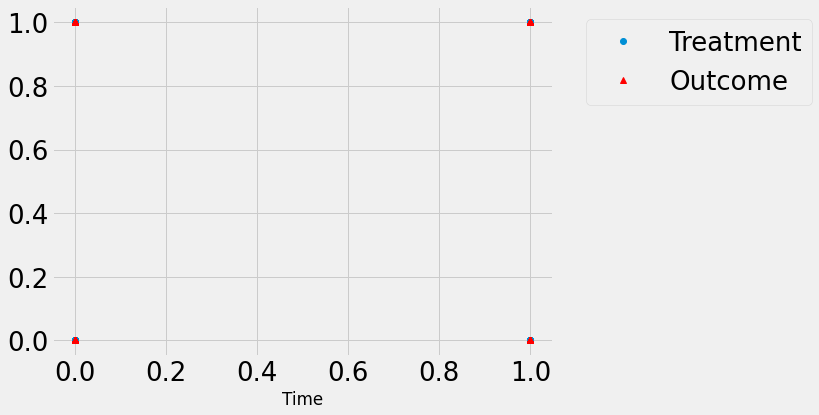

In [71]:
dowhy.plotter.plot_treatment_outcome(train["Coughing"], train["Car_Accident"], train['Lung_Cancer']) # Doen't make sense with binary data I guess

## Step 1: Model the Problem with a Causal Graph

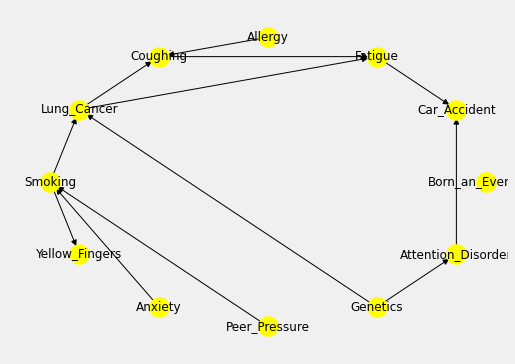

In [72]:
from IPython.display import Image, display

gml_graph = gml_to_string('tmp/backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = train,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

#display(Image(filename="backdoor_criterion_graph.png", width = 200, height = 100))

### STEP 2: Identify causal effect using properties of the formal causal graph


In [73]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### STEP 3: Estimate the causal effect

Causal Estimate is 0.15998296856036243


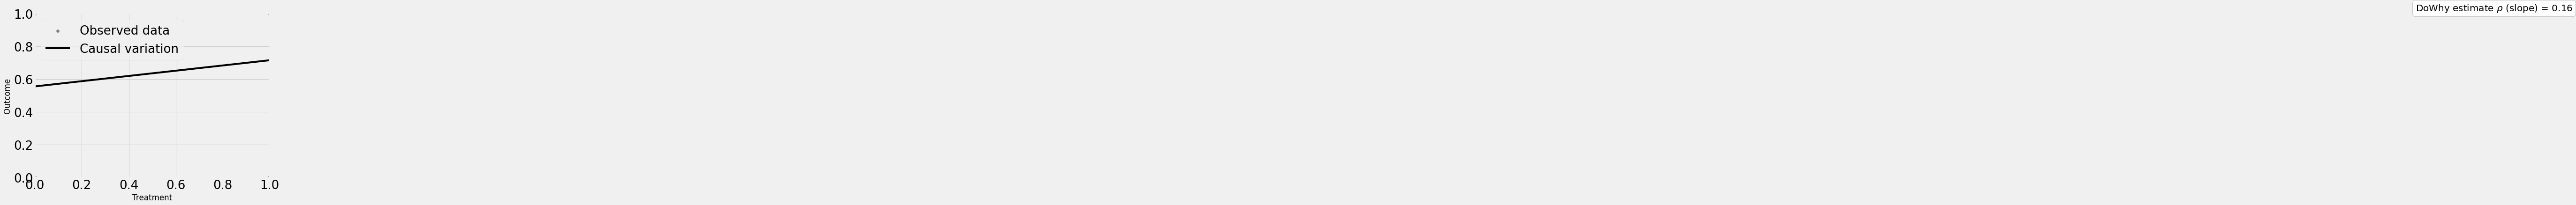

In [74]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, train["Coughing"],train["Car_Accident"])

We can also get the confidence intervals

In [75]:
estimate.get_confidence_intervals()

In [76]:
# we assume the effect of treatment for outcome is 1
effect = 1

print("DoWhy estimate is " + str(estimate.value))
print ("Actual true causal effect was {0}".format(effect))

DoWhy estimate is 0.15998296856036243
Actual true causal effect was 1


# Step 4: Refuting the Estimate

In [23]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.05284510226161476
New effect:0.001268817428312461
p value:0.48



Removing a random subset of the data

In [24]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:0.05284510226161476
New effect:0.05206613485355156
p value:0.47



# Independence Tests

In [77]:
# calculate the Pearson's correlation between two variables
import numpy as np
# calculate Pearson's correlation
corr = np.corrcoef(train['Coughing'], train['Car_Accident'])[0,1]
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.205


# Non parametric Test - Hilbert Schmidt Test

In [78]:
c_h = Hsic().test(np.array(train['Coughing']), np.array(train['Car_Accident']))
print(c_h)

IndependenceTestOutput(stat=0.04150944093981498, pvalue=4.900717658157932e-20)


### 3.B Data with conditional distribution

We then do correlation and independence tests on data with conditional distribution.

### Partial correlation with data

We use pingouin package to generate data with confoundings and then measure the partial correlation between two variables when conditioning on different covariates.

Partial correlation measures the degree of association between x and y, after removing the effect of one or more controlling variables (covar, or 𝑍).
For more implementation details see: https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [27]:
pg.corr(train['Smoking'], train['Car_Accident']) # I guess if p-val < 0.05, than the two variables are correlated to a certein degree

,n,r,CI95%,p-val,BF10,power
pearson,2000,0.051481,"[0.01, 0.1]",0.021314,0.396,0.634265


Then we test the partial correlation with conditioning on one covariate. We can see that the correlation is gone when conditioning on z.

In [69]:
pg.partial_corr(data=train, x='Smoking', y='Car_Accident', covar='Lung_Cancer').round(5)

,n,r,CI95%,p-val
pearson,2000,-0.03665,"[-0.08, 0.01]",0.1014


The results indicate that correlation between variables may be solely the result of another variable(s). When we condition on different covariates, the partial correlation changes (and may even disappear), which give us useful information for modelling the data.

In [70]:
import conditional_independence.ci_tests.nonparametric.hsic as cond_hsic

res = cond_hsic.hsic_test(train.to_numpy(), 0, 7, [8,11]) # i: int, j: int, cond_set: List[int] 
print(res)

{'statistic': 3.48379483328077e-05, 'p_value': 0.16600297195264146, 'reject': False, 'mean_approx': 2.047602191505177e-05, 'var_approx': 2.8826775600977857e-10}


The non-significant p-value tells us that these data are independent when we condition on $z$.

In [30]:
train.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Target
0,0,0,1,0,0,1,0,1,0,1,0,-1
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,-1
4,1,1,1,0,0,1,1,1,1,0,0,1


# Binary Data Analysis

In [31]:
import numpy as np
from sklearn.metrics import jaccard_score
jaccard_score(train['Coughing'], train['Car_Accident'])

# Backdoor criterion  - Tutorial 3

## Using helpers function

In [88]:
from helpers import *

bckdr_paths = get_backdoor_paths(G, 'Coughing', 'Car_Accident')
bckdr_paths

[['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [90]:
adjst_vars = get_adjustment_variables(G, bckdr_paths)
adjst_vars

,path,colliders_desc,non_colliders
0,"[Coughing, Lung_Cancer, Genetics, Attention_Di...",[],"[Lung_Cancer, Genetics, Attention_Disorder]"
1,"[Coughing, Lung_Cancer, Fatigue, Car_Accident]",[],"[Lung_Cancer, Fatigue]"


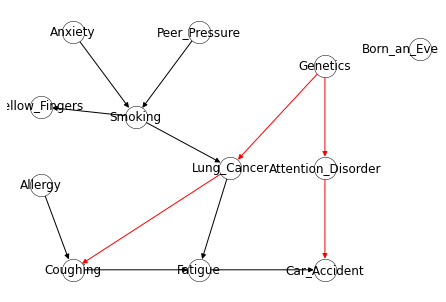

In [91]:
colors = ['black', 'black', 'black', 'black', 'r', 'r', 'r', 'black', 'black', 'black', 'r', 'black']
nx.draw(G, pos= pos, with_labels=True, node_size=500, node_color='w', edgecolors = 'black', edge_color =colors)

<!-- Lets take a look at the following path:

'Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident' -->

# Same, but now with DoWhy

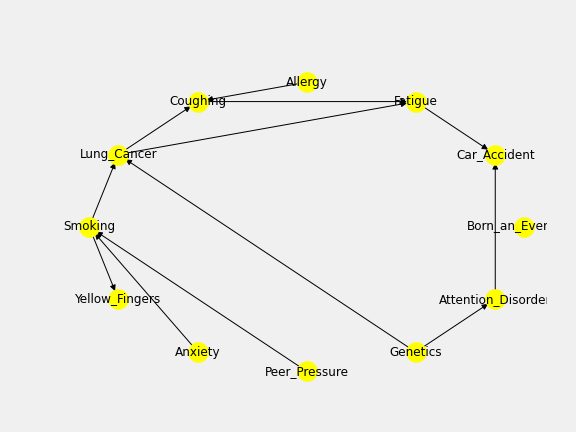

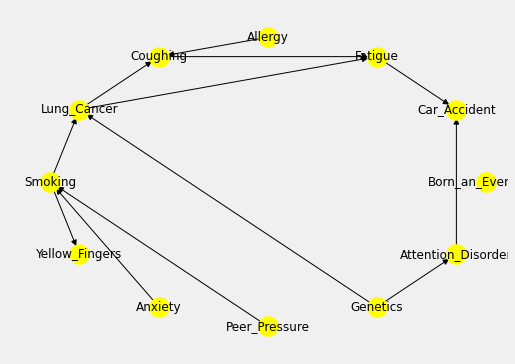

In [93]:
import dowhy
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('tmp/backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

display(Image(filename="causal_model.png", width = 200, height = 100))

In [94]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [95]:
identifier = model.identifier
identifier.identify_backdoor(identifier.treatment_name, identifier.outcome_name) # Here we see all the calid backdoor_sets

[{'backdoor_set': ('Allergy',
   'Anxiety',
   'Peer_Pressure',
   'Genetics',
   'Yellow_Fingers',
   'Smoking',
   'Attention_Disorder',
   'Lung_Cancer')},
 {'backdoor_set': ('Lung_Cancer',)}]

# Frontdoor criterion

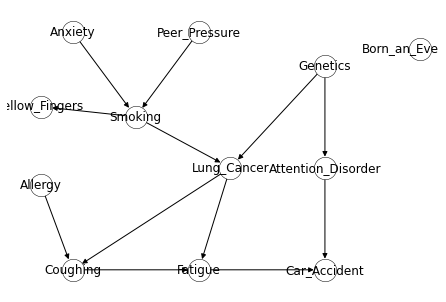

In [96]:
# we import networkx and create a directed graph
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35),}


nx.draw(G, pos= pos, with_labels=True, node_size=500, node_color='w', edgecolors ='black')
nx.write_gml(G, "frontdoor_lungs.gml")

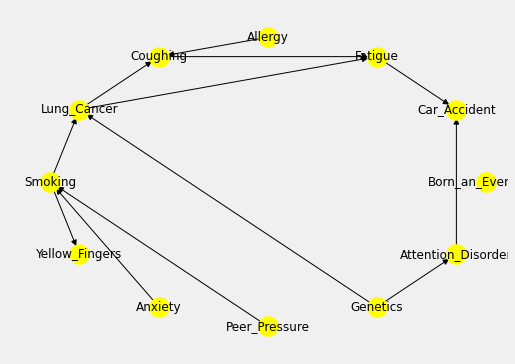

In [97]:
import dowhy
import pandas as pd
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('frontdoor_lungs.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

#display(Image(filename="causal_model.png", width = 200, height = 100))

In [67]:
# we extract the CausalGraph object from our CausalModel object
our_causal_graph = model._graph

In [68]:
# creating a copy of our graph G that is undirected
H = G.to_undirected() # undirected path
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Coughing', 'Fatigue')] # take undirected graph and say we want to go from y -> y
graph_nodes = backdoor.Backdoor(G, 'Coughing', 'Fatigue')
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]
x_w_backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
x_w_backdoor_paths

[['Coughing',
  'Lung_Cancer',
  'Genetics',
  'Attention_Disorder',
  'Car_Accident',
  'Fatigue'],
 ['Coughing', 'Lung_Cancer', 'Fatigue']]

In [69]:
# list for keeping track of which paths are blocked
path_is_blocked = []

# looping through the backdoor paths from X to W
for path in x_w_backdoor_paths:
    # the is_blocked function checks with a path is blocked when conditioning on the set conditioned_nodes
    # in this case, we are not conditioning on any nodes, so give it the empty set
    path_is_blocked.append(our_causal_graph.is_blocked(path, conditioned_nodes = [])) # not condition on anything in this case

path_is_blocked

[True, False]

In [70]:
#w_y_backdoor_paths = our_causal_graph.get_backdoor_paths('Fatigue', 'Car_Accident')
#w_y_backdoor_paths

In [71]:
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Fatigue', 'Car_Accident')] # take undirected graph and say we want to go from y -> y
graph_nodes = backdoor.Backdoor(G, 'Fatigue', 'Car_Accident')
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]
w_y_backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
w_y_backdoor_paths

[['Fatigue',
  'Coughing',
  'Lung_Cancer',
  'Genetics',
  'Attention_Disorder',
  'Car_Accident'],
 ['Fatigue', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident']]

In [72]:
# list for keeping track of which paths are blocked
path_is_blocked = []

# looping through the backdoor paths from W to Y
for path in w_y_backdoor_paths:
    # the is_blocked function checks with a path is blocked when conditioning on the set conditioned_nodes
    # in this case, we are conditioning on the set [X]
    path_is_blocked.append(our_causal_graph.is_blocked(path, conditioned_nodes = ['Coughing']))

path_is_blocked

[True, False]

We can see that not all paths are blocked by $Coughing$. Thus, the set {$W$} does not meet the frontdoor criterion and is not a valid adjustment set for measuring the effect of $Coughing$ on $Car_Accident$.

Now in dowhy

In [73]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Instrumental variables

<!-- Peer_Pressure -> Smoking -> Yellow_Fingers

Peer_Pressure is the instrumental variable in this case -->

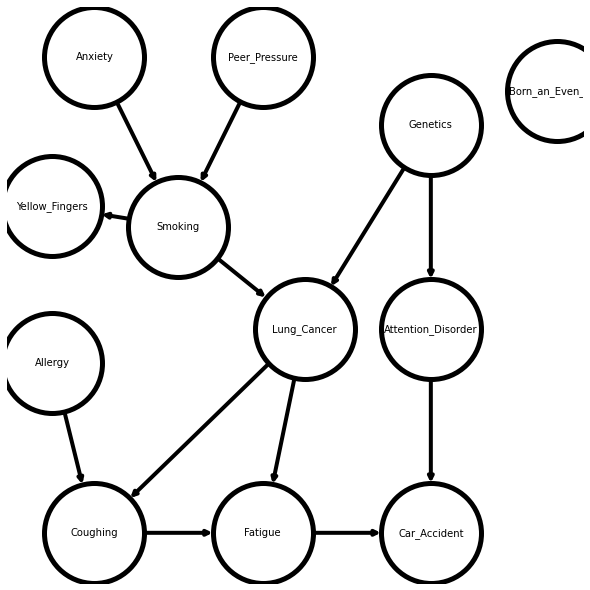

In [99]:
import numpy as np

# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(8,8))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "tmp/instrumental_variables_graph.gml")

plt.show()

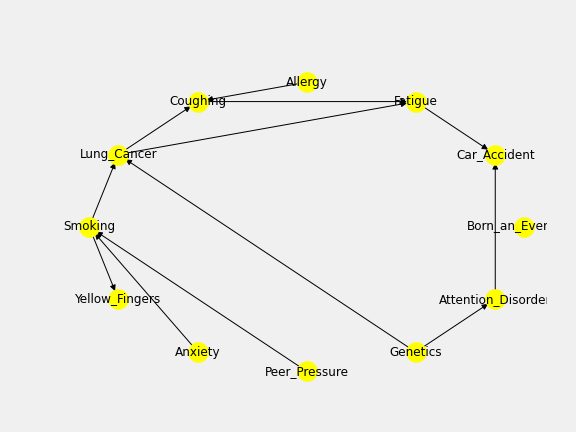

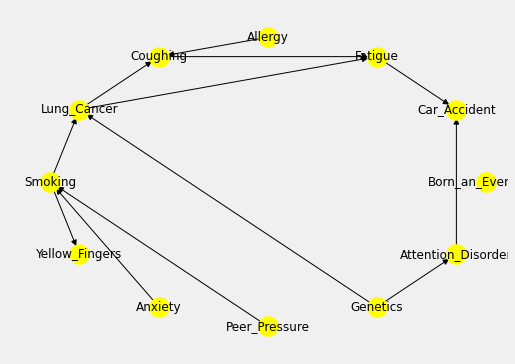

In [102]:
# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

gml_graph = gml_to_string('tmp/instrumental_variables_graph.gml')
model=CausalModel(
        data = train,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
        
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

# Estimating Causal Effects

In [104]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand) 

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Let's use the set identified by the backdoor criterion. We can thus estimate the effect of Coughing on Car_Accident when we condition on Lung_Cancer.

Let's first try estimate the effect without conditioning on these extra variables. Suppose we expect (know) that the effect is linear. We can then apply a linear estimator to find the effect. We will use linear regression.

In [105]:
# we first use only v0 and y
# we need to reshape them into the correct shape for our linear regression function
coughing_vals = train['Coughing'].values.reshape(len(train['Coughing']), 1)
carAcc_vals = train['Car_Accident'].values.reshape(len(train['Car_Accident']), 1)

In [106]:
# we import the LinearRegression object from sklearn
from sklearn.linear_model import LinearRegression

# we fit a linear regression model with v0 and y, and check what the estimated linear effect is
linear_regressor = LinearRegression() 
linear_regressor.fit(coughing_vals, carAcc_vals)
linear_regressor.coef_

array([[0.2003744]])

<!-- I think this is pretty accurate and not that much biased. Smoking and Yellow_Fingers have roughly the same mean, which is around 0.74. Therefore, this value could be quite good. But I'll continue anyways as proposed in the tutorial 4.  -->

In [108]:
# we first collect the extra variables we wish to include
LungCanc_vals = train['Lung_Cancer'].values.reshape(len(train['Lung_Cancer']), 1)

# we need to combine all of the variables we're including into one array
cough_lungCan_vals = np.concatenate((coughing_vals, LungCanc_vals), axis = 1)
cough_lungCan_vals

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [0, 1],
       [1, 1],
       [1, 1]], dtype=int64)

In [109]:
# we fit the linear regression with the extra variables included
linear_regressor.fit(cough_lungCan_vals, carAcc_vals)
linear_regressor.coef_

array([[0.15712428, 0.08553048]])

We see that our estimate (the first coeffcient) looks still not biased. Looks pretty good. Now, we try using the correct conditioning set. 

In [83]:
# W2_vals = train['Fatigue'].values.reshape(len(train['Fatigue']), 1)
# W3_vals = train['Genetics'].values.reshape(len(train['Genetics']), 1)
# # W4 is a categorical value, so we use the pandas' get_dummy function to turn it into dummy variables
# W4_vals = pd.get_dummies(train['Coughing'].values).iloc[:,1:4]

# backdoor_vars = np.concatenate((v0_vals, W0_vals, W1_vals, W2_vals, W3_vals, W4_vals), axis = 1)
# backdoor_vars

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1],
       ...,
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 1]])

In [84]:
# linear_regressor.fit(backdoor_vars, y_vals)
# linear_regressor.coef_ # Still looks good! First value still looks pretty close to the mean. 

array([[ 0.74128431, -0.0027768 , -0.00081031, -0.00328027, -0.01515241,
         0.00706855]])

Now our estimate (the first coefficient) is unbiased. So we would thus correctly conclude that our linear causal effect is 10.

DoWhy allows you to estimate causal effects using different estimators based on the adjustment sets it identifies. We can do what we did above by calling the estimate_effect function on our identified_estimand and specifying which criterion we wish to use, and which estimator. The different estimators you can use are available here: https://github.com/microsoft/dowhy/tree/master/dowhy/causal_estimators. When calling the estimator, exclude the '_estimator' at the end.

Below, we specify we want to use the adjustment set from the backdoor criterion and a linear regression estimator.

In [110]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

## Realized estimand
b: Car_Accident~Coughing+Lung_Cancer+Coughing*Attention_Disorder
Target units: ate

## Estimate
Mean value: 0.15998296856036243
### Conditional Estimates
__categorical__Attention_Disorder
(-0.001, 1.0]    0.159983
dtype: float64
Causal Estimate is 0.15998296856036243


We see that we get the same estimate as when we performed the procedure manually. Let's try one other backdoor estimator and an instrumental variable estimator.

In [121]:
train.head(10)

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_Cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1
5,1,1,0,1,0,0,1,1,1,1,1,1
6,1,1,1,1,0,0,0,1,1,0,1,1
7,1,1,1,0,0,0,1,1,1,0,1,1
8,0,0,0,0,0,0,0,1,0,0,0,0
9,1,1,1,1,0,0,1,1,1,1,1,1


In [115]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Exception: Propensity score methods are applicable only for binary treatments

In [122]:
# using the instrumental variables
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable") # iv.linear_regression
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: nonparametric-ate
Estimand expression:
                                                                              
Expectation(Derivative(Car_Accident, Allergy))⋅Expectation(Derivative(Coughing

           -1
, Allergy))  
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)
Estimand assumption 3, treatment_effect_homogeneity: Each unit's treatment ['Coughing'] is affected in the sam

Not every estimator will always give a good estimate. This depends on the true nature of the effect (linear, exponential, etc.), and the assumptions made by the estimator. We can do this one correctly using the IV notebook shown by Sara in class which implements 2SLS.

In [ ]:
# we define a function to extract our linear regression coefficient
def linear_coeff(X,Y):
    linear_regressor = LinearRegression() 
    linear_regressor.fit(X, Y)
    return linear_regressor.coef_

In [ ]:
# we reshape the variables we are going to use (Z1 is a sufficient instrumental variable)
v0 = train['Smoking'].values.reshape(-1,1)
z1 = train['Anxiety'].values.reshape(-1,1)
y = train['Yellow_Fingers'].values.reshape(-1,1)

In [ ]:
# we can calculate the linear effect that Z1 has on v0, and what our estimated linear v0 values are
vhat = linear_coeff(z1, v0) * z1

In [ ]:
# we can finally calculate the linear effect of vhat on y
linear_coeff(vhat, y)

array([[0.73548677]])